# Exercise: Statistics – sample vs population metrics


In this notebook, we will present a series of code exercises that will test and enhance your understanding of sample and population metrics, the central limit theorem (CLT), and confidence intervals.

## Learning objectives

By the end of this notebook, you should be able to:
- Differentiate between sample and population metrics.
- Understand where the central limit theorem is utilised.
- Describe the function and measurement of confidence intervals.

## Exercises

Suppose we are data scientists working for an environmental organisation. Our task is to analyse data related to forest areas across different regions to help formulate conservation strategies. The dataset includes forest areas (in square kilometres) from over 1,000 regions worldwide.

### Exercise 1

We are working with a dataset that contains information about different species found in national parks around the world. The dataset includes data on the number of individual animals of each species found in these parks.

Task: Calculate the population mean (`population_mean`) and variance (`population_variance`) of the species count.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generating random data. Fixed seed for reproducibility
np.random.seed(0)
forest_areas = np.random.randint(500, 10000, size=1000)  # Forest areas in sq km
regions = ['Region' + str(i) for i in range(1, 1001)]

# Creating a dictionary
data = {'Region': regions, 'Forest_Area': forest_areas}

# Converting to a pandas DataFrame
df = pd.DataFrame(data)

# insert code here
sample = np.random.choice(df['Forest_Area'], 200)

pop_mean = df['Forest_Area'].mean()
sample_mean = sample.mean()

pop_var = df['Forest_Area'].var()
sample_var = sample.var()

print('sample: ', sample)

print('population mean: ', pop_mean)
print('sample mean: ', sample_mean)

# how it is calculated is add everything and divide by number
mean = 0
for i in df['Forest_Area']:
    mean += i
mean = mean / len(df['Forest_Area'])
print('population mean handmade: ', mean, "\n")


print('population std: ', df['Forest_Area'].std())
print('sample std: ', sample.std())

std_dev = 0
for i in df['Forest_Area']:
    std_dev += (i - mean) ** 2
std_dev = np.sqrt(std_dev / len(df['Forest_Area']))
print('population std handmade: ', std_dev, "\n")

print('population variance: ', pop_var)
print('sample variance: ', sample_var)

var = 0
for i in df['Forest_Area']:
    var += (i - mean) ** 2
var = var / len(df['Forest_Area'])
print('population variance handmade: ', var, "\n")

# Q1 why do we root in std deviation?
# Q2 in this code we are using .std() for both pop and sample but the sample should be n-1 in the formula root mean square / n?
# Q3 std deviation vs variance
# Q4 variance handmade is different from variance (probably python stuff trying to save space or smthn and i should use float idk will ask still)



sample:  [ 699 1095 5484 2027 3497 4047 3210 4176 3607 7405 7704 8510 9236 7430
 9660 5772  997 3790 5235 2211 1159 6888 1571 8818 1023 5717 8908 3724
 3837 7934 3966 5062 1327 6737 3456 5602 2776 7395 1351 1173 8204 7322
 5060 3780 3327 2844 9720 7782 1940  665  722 3397 7014 4248 8973 9794
 5772 8929 1071 4308 7596 6219 9388 9614 7984  937 5846 6127 8204 9816
 5528  875 9089 8409 9141 8563 2347 9129 5497 1908 9859 9200 9269 3191
 6408  875 3919 7526 3210 2937 4422 1669 5603 2638 7863 6196 5220 3044
 5717 1191 5235 9389 3489 5541 4215 2008 2887 7427 7521 5497 7113 3724
 1473 6226 1214 6672 2515 8470 7896 8543 6120 5631  562 3966 7362 7874
 9732 2438 4471 1564 5303 8856 8312 3919 5772  631 6181 3883 7959 6181
 8388 8866 1571 8099 2240 4469 7968 9845 1652 1106 9390 4412  873 7421
  743 5152 5649 6824 9552 2568 1791 5846 9799 1741 5894 5868 7134 3171
 1327 1403  665 8818 7511 1327 9614 2338 3793 7840 6746 1236  829 2027
 2231  665 7637 9911 9859 3457 7906 9297 1401 4599 9065 7952 5223 97

### Exercise 2

Select a random sample of 30 regions from the dataset and calculate sample mean and variance. Compare these with population metrics.

In [2]:
# insert code here
np.random.seed(0)
sample = np.random.choice(df['Forest_Area'], 30)
print('population mean: ', pop_mean)
print('sample mean: ', sample_mean, "\n")
print('population std: ', df['Forest_Area'].std())
print('sample std: ', sample.std(), "\n")
print('population variance: ', pop_var)
print('sample variance: ', sample_var)

# when do say the data is enough and that the sample is a good representative of the population
# does sample size scale with population size? 10:100 100:1000 2000:20000 a fixed percentage or a fixed number of samples

population mean:  5378.98
sample mean:  5236.91 

population std:  2743.166674667255
sample std:  2724.6216585467832 

population variance:  7524963.405005004
sample variance:  8621388.741899999


### Exercise 3

Demonstrate the central limit theorem (CLT) by plotting the distribution of sample means.

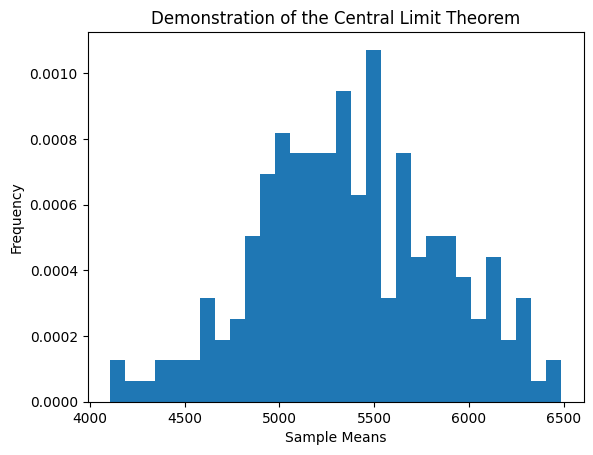

In [3]:
# insert code here
# Step 1: Generate a population with a non-normal distribution
population = df['Forest_Area']

# sample = np.random.choice(population, 200)
np.random.seed(0)
# Step 2: Draw multiple samples from this population
sample_size = 30
num_samples = 200
samples = [np.random.choice(population, size=sample_size) for _ in range(num_samples)]

# Step 3: Calculate the mean of each sample
sample_means = [np.mean(sample) for sample in samples]

# Step 4: Plot the distribution of these sample means
plt.hist(sample_means, bins=30, density=True) 
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title('Demonstration of the Central Limit Theorem')
plt.show()

# Q5 why cant sample size be 1
# Q6 no idea why im doing this / in this way

### Exercise 4

Calculate a 95% confidence interval for the mean of a sample.

In [4]:
import numpy as np
import scipy.stats as stats

np.random.seed(0)
# Assume we have a sample
sample = np.random.choice(df['Forest_Area'], 30)

# Calculate the sample mean and standard error
sample_mean = np.mean(sample)
se = stats.sem(sample)

# Calculate the 95% confidence interval
confidence = 0.95
ci = stats.t.interval(confidence, len(sample)-1, loc=sample_mean, scale=se)

print(f"The 95% confidence interval is {ci}")

#Q7 no idea what this is

The 95% confidence interval is (3572.083669445489, 5641.649663887845)
